In [10]:
import pandas as pd

# Read the cleaned.csv file
df = pd.read_csv('filtered.csv')

# Filter the DataFrame by Disability_indicator, keeping only values that are 1
filtered_df = df[df['Disability_indicator'] == 1]

# Calculate the number of rows in filtered_df
num_rows = len(filtered_df)
print(f"Number of rows with Disability_indicator as 1: {num_rows}")


# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('filtered_disability_data.csv', index=False)

Number of rows with Disability_indicator as 1: 2876


In [12]:
# Filter the DataFrame based on the conditions for Difficulty_walking, Difficulty_hearing, and Difficulty_seeing
filtered_df = filtered_df[
    (filtered_df['Difficulty_walking'].isin([2, 3, 4])) |
    (filtered_df['Difficulty_hearing'].isin([2, 3, 4])) |
    (filtered_df['Difficulty_hand_finger'].isin([2, 3, 4])) |
    (filtered_df['Difficulty_remembering_concentrating'].isin([2, 3, 4])) |
    (filtered_df['Difficulty_seeing'].isin([2, 3, 4]))
    # Difficulty_hand_finger	Difficulty_remembering_concentrating	Difficulty_hand_finger
    # Difficulty_walking	Difficulty_hearing	Difficulty_seeing
]

# Count the number of rows after filtering
num_filtered_rows = len(filtered_df)
print(f"Number of rows after filtering: {num_filtered_rows}")

# # Select only the relevant columns, including 'pid'
# filtered_df = filtered_df[['pid', 'Disability_indicator', 'Difficulty_walking', 'Difficulty_hearing', 'Difficulty_seeing', 'Difficulty_hand_finger', 'Difficulty_remembering_concentrating']]

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('filtered_disability_data.csv', index=False)

Number of rows after filtering: 2863


In [21]:
# Read the filtered_disability_data.csv file
filtered_df = pd.read_csv('filtered_disability_data.csv')

# Create a new attribute called 'issue'
filtered_df['issue'] = ''

# Define a function to determine the issue based on difficulty attributes
def determine_issue(row):
    issues = []
    
    # Check for difficulties in walking, hearing, and seeing
    walking = row['Difficulty_walking']
    hearing = row['Difficulty_hearing']
    seeing = row['Difficulty_seeing']
    hand_finger = row['Difficulty_hand_finger']
    concentrating = row['Difficulty_remembering_concentrating']
    
    # Check if there are any values greater than 2 in the difficulty attributes
    higher_difficulties = any(difficulty > 2 for difficulty in [walking, hearing, seeing, hand_finger, concentrating])
    
    # Case 1: When 3 or 4 exists, append the respective issue
    if walking in [3, 4] or hand_finger in [3, 4]:
        issues.append('mobility')
    if hearing in [3, 4]:
        issues.append('dhh')
    if seeing in [3, 4]:
        issues.append('blv')
    if concentrating in [3, 4]:
        issues.append('cognitive')
    
    # Case 2: When no 3 or 4 exists, append any 2
    if not higher_difficulties:
        if walking == 2 or hand_finger == 2:
            issues.append('mobility')
        if hearing == 2:
            issues.append('dhh')
        if seeing == 2:
            issues.append('blv')
        if concentrating == 2:
            issues.append('cognitive')
    return ', '.join(issues)

# Apply the function to each row
filtered_df['issue'] = filtered_df.apply(determine_issue, axis=1)

# Split the 'issue' column into multiple columns
issues_split = filtered_df['issue'].str.split(', ', expand=True)

# Rename the split columns as issue_1, issue_2, issue_3, etc.
issues_split.columns = [f'issue_{i+1}' for i in range(issues_split.shape[1])]

# Concatenate the new columns with the original dataframe
filtered_df = pd.concat([filtered_df, issues_split], axis=1)

# Select only the 'pid' and new issue columns to merge with the original dataframe
issues_columns = ['pid'] + [f'issue_{i+1}' for i in range(issues_split.shape[1])]
issues_df = filtered_df[issues_columns]

# Merge the issues with the original dataframe, specifying suffixes to avoid duplicate columns
df = df.merge(issues_df, on='pid', how='left', suffixes=('', '_issue'))

# Save the DataFrame with the new 'issue' attribute to a new CSV file
df.to_csv('filtered_disability_data_with_issues.csv', index=False)

In [23]:
# Read the filtered_disability_data_with_issues.csv file
df = pd.read_csv('filtered_disability_data_with_issues.csv')

# Drop rows where the 'issue' column is NA
df = df.dropna(subset=['issue'])

# Save the updated DataFrame to a new CSV file
df.to_csv('filtered_disability_data_with_issues_cleaned.csv', index=False)

                                   Hours_worked_Week  Income_wages  \
Hours_worked_Week                           1.000000     -0.054144   
Income_wages                               -0.054144      1.000000   
Level_of_tiredness                          0.037472      0.023504   
Daysofwork_missed_year                     -0.030045      0.209450   
PA_activity_aerobic_strengthening          -0.022046      0.493974   
Moderate_PA_duration                        0.066656     -0.021780   
Vigorous_PA_duration                        0.045329     -0.032817   
Severity_of_depression                     -0.006036      0.405295   
Severity_of_anxiety_symptoms                0.004351      0.450285   

                                   Level_of_tiredness  Daysofwork_missed_year  \
Hours_worked_Week                            0.037472               -0.030045   
Income_wages                                 0.023504                0.209450   
Level_of_tiredness                           1.000000   

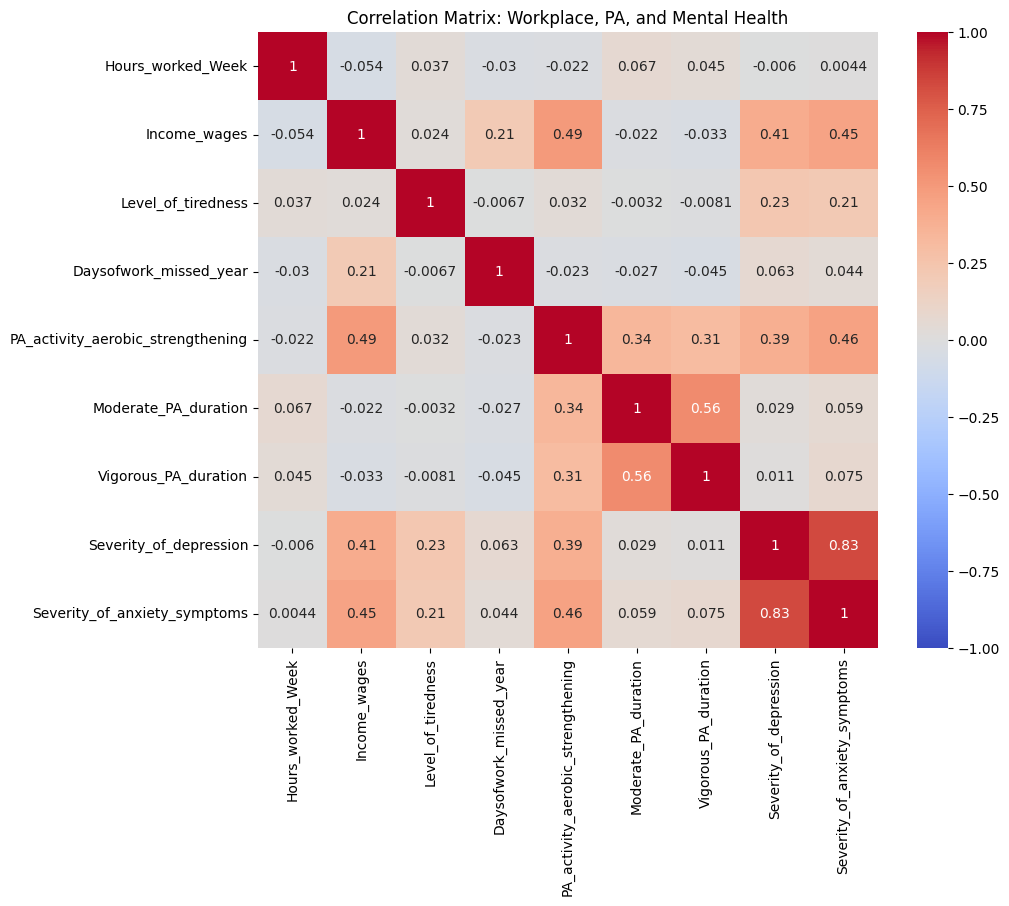

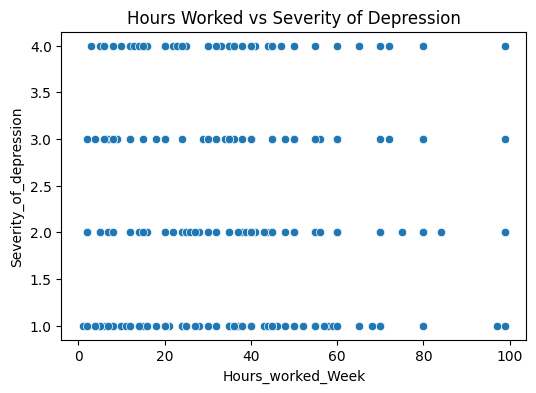

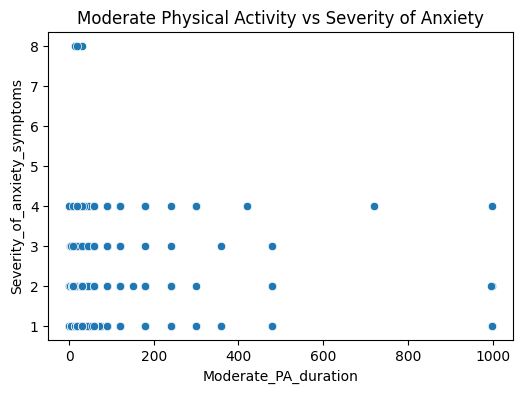

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Read the filtered_disability_data_with_issues_cleaned.csv file
df = pd.read_csv('filtered_disability_data_with_issues_cleaned.csv')

# Select the relevant columns for workplace, PA, and mental health
columns_of_interest = [
    'Hours_worked_Week',            # Workplace: Number of hours worked
    'Income_wages',                 # Workplace: Income
    'Level_of_tiredness',           # Workplace: Level of tiredness
    'Daysofwork_missed_year',       # Workplace: Days of work missed per year
    'PA_activity_aerobic_strengthening',  # Physical activity
    'Moderate_PA_duration',         # Moderate PA
    'Vigorous_PA_duration',         # Vigorous PA
    'Severity_of_depression',       # Mental health: Severity of depression
    'Severity_of_anxiety_symptoms'  # Mental health: Severity of anxiety
]

# Filter the dataset for the selected columns
df_subset = df[columns_of_interest]

# Correlation matrix
correlation_matrix = df_subset.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Workplace, PA, and Mental Health')
plt.show()

# Create scatter plots to visualize the relationships between variables
# For example: PA vs. Depression, PA vs. Anxiety, Hours worked vs. Depression, etc.

# Scatterplot: Hours worked vs. Severity of Depression
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Hours_worked_Week', y='Severity_of_depression', data=df_subset)
plt.title('Hours Worked vs Severity of Depression')
plt.show()

# Scatterplot: Moderate PA vs. Severity of Anxiety
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Moderate_PA_duration', y='Severity_of_anxiety_symptoms', data=df_subset)
plt.title('Moderate Physical Activity vs Severity of Anxiety')
plt.show()

In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming you've already loaded your dataset into a DataFrame named 'df'

# Define the independent variables for the regression model
X = df[['PA_activity_aerobic_strengthening',  # Physical activity
        'Hours_worked_Week',                  # Workplace: Number of hours worked
        'Income_wages',                       # Workplace: Income
        'Level_of_tiredness',                 # Workplace: Level of tiredness
        'Age',                                # Control: Age
        'Sex']]                               # Control: Sex

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Handling missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaN
X = X.dropna()  # Drop rows with NaN values

# Model 1: Severity of Depression
y_depression = df['Severity_of_depression']
y_depression = y_depression[X.index].dropna()  # Align with X

# Model 2: Severity of Anxiety
y_anxiety = df['Severity_of_anxiety_symptoms']
y_anxiety = y_anxiety[X.index].dropna()  # Align with X

# Align both X and y for depression and anxiety
X_depression = X.loc[y_depression.index]
X_anxiety = X.loc[y_anxiety.index]

# Fit the linear regression model for depression
model_depression = sm.OLS(y_depression, X_depression).fit()

# Fit the linear regression model for anxiety
model_anxiety = sm.OLS(y_anxiety, X_anxiety).fit()

# Extract the relevant parameters for both models
results_depression = pd.DataFrame({
    'Variable': model_depression.params.index,
    'Estimate (Depression)': model_depression.params.values,
    'Std. Error (Depression)': model_depression.bse.values,
    't-value (Depression)': model_depression.tvalues.values,
    'Pr(>|t|) (Depression)': model_depression.pvalues.values
})

results_anxiety = pd.DataFrame({
    'Variable': model_anxiety.params.index,
    'Estimate (Anxiety)': model_anxiety.params.values,
    'Std. Error (Anxiety)': model_anxiety.bse.values,
    't-value (Anxiety)': model_anxiety.tvalues.values,
    'Pr(>|t|) (Anxiety)': model_anxiety.pvalues.values
})

print('Regression Results for Severity of Depression:')
print(results_depression)

print('\nRegression Results for Severity of Anxiety:')
print(results_anxiety)  

Regression Results for Severity of Depression:
                            Variable  Estimate (Depression)  \
0                              const               2.656376   
1  PA_activity_aerobic_strengthening               0.008699   
2                  Hours_worked_Week              -0.003518   
3                       Income_wages               0.043923   
4                 Level_of_tiredness               0.132747   
5                                Age              -0.021630   
6                                Sex               0.175037   

   Std. Error (Depression)  t-value (Depression)  Pr(>|t|) (Depression)  
0                 0.344110              7.719564           7.590385e-14  
1                 0.036779              0.236525           8.131327e-01  
2                 0.002927             -1.202078           2.299642e-01  
3                 0.083669              0.524959           5.998696e-01  
4                 0.062841              2.112446           3.519725e-02  
5   

In [34]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Assuming your DataFrame is already loaded as 'df'
# Columns for PA, depression, anxiety, and workplace factors
pa_column = 'PA_activity_aerobic_strengthening'
depression_column = 'Severity_of_depression'
anxiety_column = 'Severity_of_anxiety_symptoms'
tiredness_column = 'Level_of_tiredness'
days_absent_column = 'Daysofwork_missed_year'

# Convert columns to numeric, coerce errors to NaN
df[pa_column] = pd.to_numeric(df[pa_column], errors='coerce')
df[depression_column] = pd.to_numeric(df[depression_column], errors='coerce')
df[anxiety_column] = pd.to_numeric(df[anxiety_column], errors='coerce')
df[tiredness_column] = pd.to_numeric(df[tiredness_column], errors='coerce')
df[days_absent_column] = pd.to_numeric(df[days_absent_column], errors='coerce')

# Fill missing values with the median of each column
df[pa_column].fillna(df[pa_column].median(), inplace=True)
df[depression_column].fillna(df[depression_column].median(), inplace=True)
df[anxiety_column].fillna(df[anxiety_column].median(), inplace=True)
df[tiredness_column].fillna(df[tiredness_column].median(), inplace=True)
df[days_absent_column].fillna(df[days_absent_column].median(), inplace=True)

# Create a dictionary to store the results
correlation_results = {
    'Correlation Type': ['Pearson Correlation', 'Spearman Correlation'],
    'PA and Depression': [],
    'PA and Anxiety': [],
    'PA and Tiredness': [],
    'PA and Days Absent': [],
    'Anxiety and Tiredness': [],
    'Depression and Tiredness': []
}

# Calculate Pearson Correlations
pearson_corr_pa_depression, _ = pearsonr(df[pa_column], df[depression_column])
pearson_corr_pa_anxiety, _ = pearsonr(df[pa_column], df[anxiety_column])
pearson_corr_pa_tiredness, _ = pearsonr(df[pa_column], df[tiredness_column])
pearson_corr_pa_days_absent, _ = pearsonr(df[pa_column], df[days_absent_column])
pearson_corr_anxiety_tiredness, _ = pearsonr(df[anxiety_column], df[tiredness_column])
pearson_corr_depression_tiredness, _ = pearsonr(df[depression_column], df[tiredness_column])

# Calculate Spearman Correlations
spearman_corr_pa_depression, _ = spearmanr(df[pa_column], df[depression_column])
spearman_corr_pa_anxiety, _ = spearmanr(df[pa_column], df[anxiety_column])
spearman_corr_pa_tiredness, _ = spearmanr(df[pa_column], df[tiredness_column])
spearman_corr_pa_days_absent, _ = spearmanr(df[pa_column], df[days_absent_column])
spearman_corr_anxiety_tiredness, _ = spearmanr(df[anxiety_column], df[tiredness_column])
spearman_corr_depression_tiredness, _ = spearmanr(df[depression_column], df[tiredness_column])

# Add the correlation results to the dictionary
correlation_results['PA and Depression'] = [pearson_corr_pa_depression, spearman_corr_pa_depression]
correlation_results['PA and Anxiety'] = [pearson_corr_pa_anxiety, spearman_corr_pa_anxiety]
correlation_results['PA and Tiredness'] = [pearson_corr_pa_tiredness, spearman_corr_pa_tiredness]
correlation_results['PA and Days Absent'] = [pearson_corr_pa_days_absent, spearman_corr_pa_days_absent]
correlation_results['Anxiety and Tiredness'] = [pearson_corr_anxiety_tiredness, spearman_corr_anxiety_tiredness]
correlation_results['Depression and Tiredness'] = [pearson_corr_depression_tiredness, spearman_corr_depression_tiredness]

# Convert the results dictionary to a DataFrame for easy viewing
correlation_table = pd.DataFrame(correlation_results)

# Display the table
print(correlation_table)

       Correlation Type  PA and Depression  PA and Anxiety  PA and Tiredness  \
0   Pearson Correlation           0.388238        0.456479         -0.003259   
1  Spearman Correlation           0.059926        0.109595         -0.045506   

   PA and Days Absent  Anxiety and Tiredness  Depression and Tiredness  
0            0.000016               0.140077                  0.164981  
1            0.012891               0.140474                  0.174397  


/var/folders/sh/v096k0vx1d9cqkvjcjm4241c0000gq/T/ipykernel_1166/804746150.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[pa_column].fillna(df[pa_column].median(), inplace=True)
/var/folders/sh/v096k0vx1d9cqkvjcjm4241c0000gq/T/ipykernel_1166/804746150.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val